In [2]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from pathlib import Path
import contextily as ctx



In [3]:

mapbox_token = "pk.eyJ1IjoiZG1jZG9uYWxkOTQ4MSIsImEiOiJjbHd4N3EwamwxMnhnMmlwemNiaDNqOHhrIn0.XjFg3HBwIg56bEGPe3DIHA"
data_dir = Path("./extracted_recent_ls_data/NDVI")
dataset_files = [f for f in data_dir.iterdir()]



In [4]:

# Open the GeoTIFF files

datasets = []
l = b = r = t = None
for fi in dataset_files:
    print(f"{l = } {b = } {r = } {t = }")
    ds = rasterio.open(fi)
    _l, _b, _r, _t, = ds.bounds

    if not l:
        l = _l
    if not b:
        b = _b
    if not r:
        r = _r
    if not t:
        t = _t


    if _l < l:
        l = _l
    if _b < b:
        b = _b
    if _t > t:
        t = _t
    if _r > r:
        r = _r
    
        


# dataset1 = rasterio.open(dataset_files[0])
# l, b, r, t = dataset1.bounds
# dataset2 = rasterio.open(dataset_files[1])


l = None b = None r = None t = None
l = 110085.0 b = 3720585.0 r = 336915.0 t = 3946515.0
l = 110085.0 b = 3552885.0 r = 584415.0 t = 3946515.0
l = 110085.0 b = 3552885.0 r = 584415.0 t = 4107015.0
l = 110085.0 b = 3552885.0 r = 584415.0 t = 4107015.0
l = 110085.0 b = 3552885.0 r = 883215.0 t = 4107015.0
l = 110085.0 b = 3552885.0 r = 883215.0 t = 4425315.0
l = 110085.0 b = 3552885.0 r = 883215.0 t = 4425315.0
l = 110085.0 b = 3552885.0 r = 883215.0 t = 4425315.0
l = 110085.0 b = 3552885.0 r = 883215.0 t = 4425315.0
l = 110085.0 b = 3552885.0 r = 883215.0 t = 4425315.0
l = 110085.0 b = 3552885.0 r = 883215.0 t = 4741515.0
l = 110085.0 b = 3552885.0 r = 883215.0 t = 4741515.0
l = 110085.0 b = 3552885.0 r = 883215.0 t = 4741515.0
l = 110085.0 b = 3552885.0 r = 883215.0 t = 4741515.0
l = 110085.0 b = 3552885.0 r = 883215.0 t = 4741515.0
l = 110085.0 b = 3552885.0 r = 883215.0 t = 4741515.0
l = 110085.0 b = 3552885.0 r = 883215.0 t = 4741515.0
l = 110085.0 b = 3552885.0 r = 883215.0 t = 47

In [5]:

ca_min_lat = 32.5
ca_max_lat = 42
ca_min_lon = -124.5
ca_max_lon = -114.0

w, s, e, n = (
    ca_min_lon,
    ca_min_lat,
    ca_max_lon,
    ca_max_lat
    )
ca_raster = ctx.bounds2raster(w, s, e, n, 
                    ll=True, 
                    path="ca.tiff",
                    source=ctx.providers.MapBox(accessToken=mapbox_token, id="mapbox/satellite-v9")
                )

In [6]:
l, r, b, t

(110085.0, 883215.0, 3552885.0, 4745115.0)

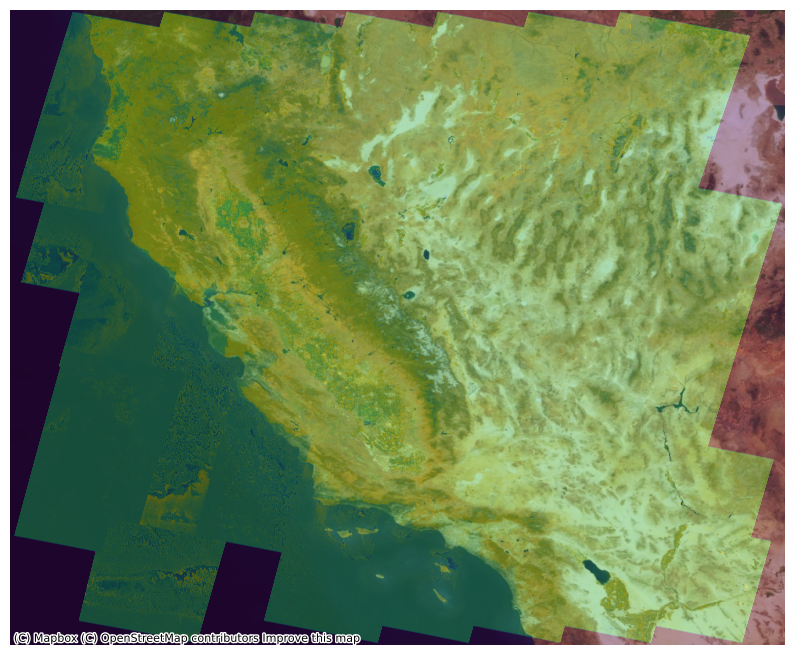

In [12]:
data = rasterio.open("mosaic.tiff")

l, b, r, t = data.bounds

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

im = ax.imshow(data.read(1), extent=[l,r,b,t])

# ctx.add_basemap(ax, crs=data.crs, source=ctx.providers.MapBox(accessToken=mapbox_token, id="mapbox/satellite-streets-v9"))
ctx.add_basemap(ax, crs=data.crs, source=ctx.providers.MapBox(accessToken=mapbox_token, id="mapbox/satellite-v9"))
ctx.add_basemap(ax, crs=data.crs, source="mosaic.tiff", alpha=0.4)

plt.axis('off')
plt.show()

In [27]:

converted_data_dir = Path("./converted_recent_ls_data/NDVI")
converted_dataset_files = [f for f in data_dir.iterdir()]

In [26]:
import numpy as np
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

dst_crs = 'EPSG:4326'

for f in dataset_files:
    with rasterio.open(f) as src:
        transform, width, height = calculate_default_transform(
            src.crs, dst_crs, src.width, src.height, *src.bounds)
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': dst_crs,
            'transform': transform,
            'width': width,
            'height': height
        })

        out_file_path = Path('converted_recent_ls_data/NDVI') / f.name
        with rasterio.open(out_file_path, 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rasterio.band(src, i),
                    destination=rasterio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=dst_crs,
                    resampling=Resampling.nearest)


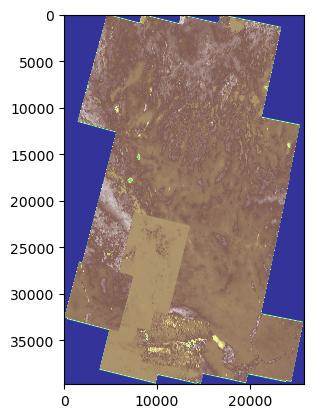

ValueError: Source shape (1, 39741, 25771) is inconsistent with given indexes 3

In [29]:
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import glob
import os


src_files_to_mosiac = []

for sim in converted_dataset_files:
    src = rasterio.open(sim)
    src_files_to_mosiac.append(src)


mos, out_trans = merge(src_files_to_mosiac)

show(mos, cmap='terrain')

with rasterio.open("./test_out.tif","w", driver ='Gtiff',count=3,
            height= mos.shape[1],
            width= mos.shape[2],
            transform= out_trans,
            crs= src.crs,
            dtype= src.dtypes[0]) as dest:
                dest.write(mos)
